In [5]:
import pandas as pd
import openpyxl

In [6]:
df = pd.read_excel('OnlineRetail.xlsx')

In [7]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [9]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [10]:
df1 = df.dropna()
df1.describe()

,Quantity,UnitPrice,CustomerID
count,406829.000000,406829.000000,406829.000000
mean,12.061303,3.460471,15287.690570
std,248.693370,69.315162,1713.600303
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,13953.000000
50%,5.000000,1.950000,15152.000000
75%,12.000000,3.750000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [11]:
df1 = df1[df1.Quantity>0]
df1.describe()

,Quantity,UnitPrice,CustomerID
count,397924.000000,397924.000000,397924.000000
mean,13.021823,3.116174,15294.315171
std,180.420210,22.096788,1713.169877
min,1.000000,0.000000,12346.000000
25%,2.000000,1.250000,13969.000000
50%,6.000000,1.950000,15159.000000
75%,12.000000,3.750000,16795.000000
max,80995.000000,8142.750000,18287.000000


In [12]:
df1['Amount'] = df1['Quantity']*df1['UnitPrice']

In [14]:
orders = df1.groupby(by=['CustomerID','Country'],as_index=False)['InvoiceNo'].count()
orders.sort_values(by='InvoiceNo',ascending=False).head(10)

,CustomerID,Country,InvoiceNo
4019,17841.0,United Kingdom,7847
1888,14911.0,EIRE,5677
1298,14096.0,United Kingdom,5111
334,12748.0,United Kingdom,4596
1670,14606.0,United Kingdom,2700
2185,15311.0,United Kingdom,2379
1698,14646.0,Netherlands,2080
570,13089.0,United Kingdom,1818
699,13263.0,United Kingdom,1677
1443,14298.0,United Kingdom,1637


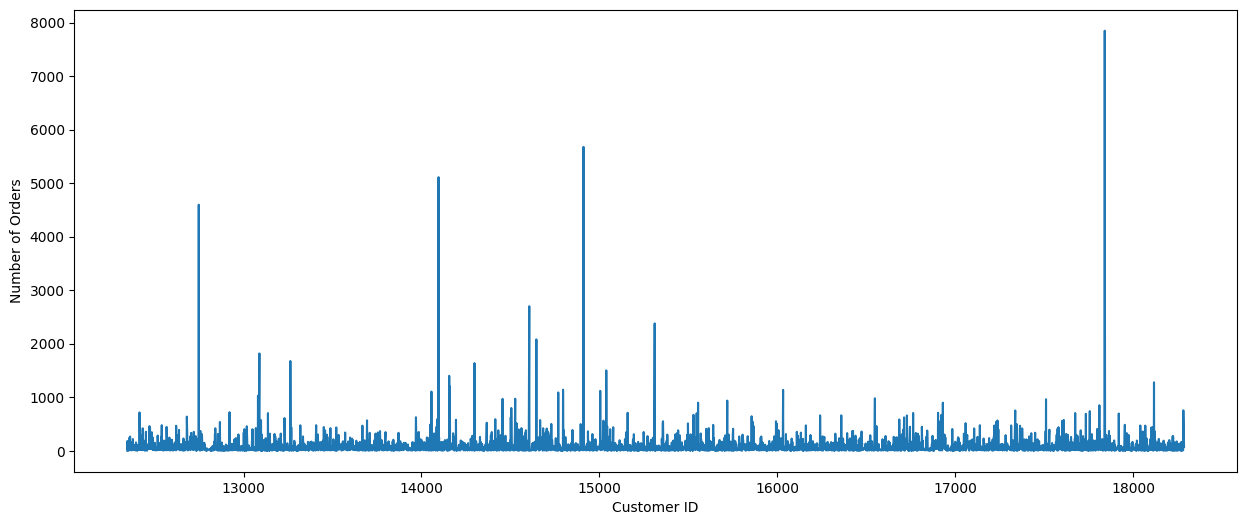

In [15]:
import matplotlib.pyplot as plt
plt.subplots(figsize=(15,6))
plt.plot(orders.CustomerID,orders.InvoiceNo)
plt.xlabel('Customer ID')
plt.ylabel('Number of Orders')
plt.show()

In [16]:
money_spent = df1.groupby(by=['CustomerID','Country'],as_index=False)['Amount'].sum()
money_spent.sort_values(by='Amount',ascending=False).head(10)

,CustomerID,Country,Amount
1698,14646.0,Netherlands,280206.02
4210,18102.0,United Kingdom,259657.30
3737,17450.0,United Kingdom,194550.79
3017,16446.0,United Kingdom,168472.50
1888,14911.0,EIRE,143825.06
57,12415.0,Australia,124914.53
1342,14156.0,EIRE,117379.63
3780,17511.0,United Kingdom,91062.38
2711,16029.0,United Kingdom,81024.84
0,12346.0,United Kingdom,77183.60


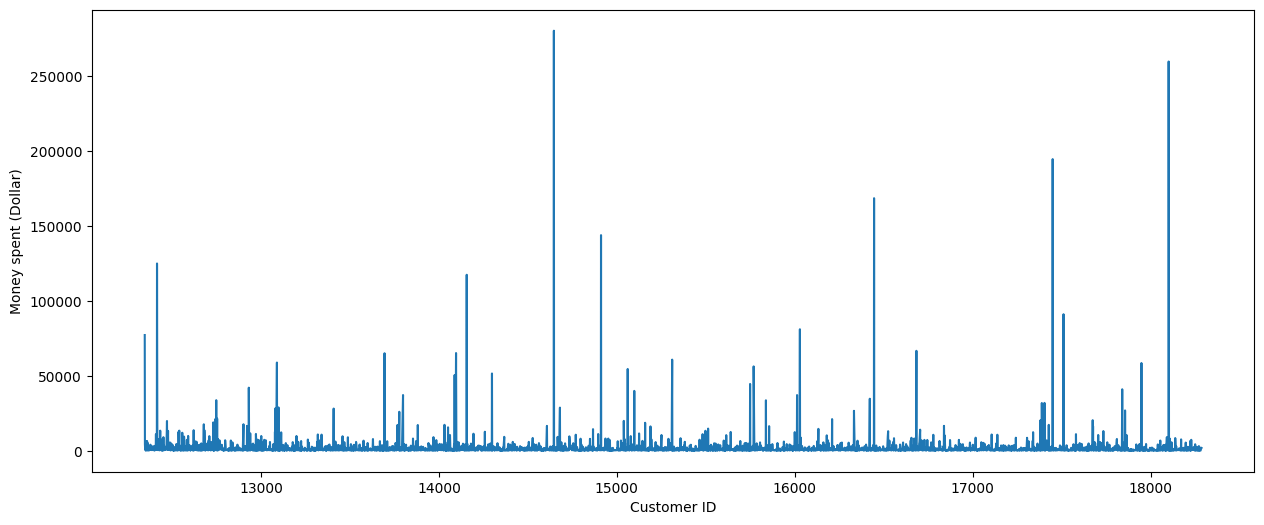

In [17]:
plt.subplots(figsize=(15,6))
plt.plot(money_spent.CustomerID,money_spent.Amount)
plt.xlabel('Customer ID')
plt.ylabel('Money spent (Dollar)')
plt.show()


In [19]:
df1['InvoiceDate'] = pd.to_datetime(df1['InvoiceDate'],format='%d-%m-%Y %H:%M')
df1.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 397924 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    397924 non-null  object        
 1   StockCode    397924 non-null  object        
 2   Description  397924 non-null  object        
 3   Quantity     397924 non-null  int64         
 4   InvoiceDate  397924 non-null  datetime64[ns]
 5   UnitPrice    397924 non-null  float64       
 6   CustomerID   397924 non-null  float64       
 7   Country      397924 non-null  object        
 8   Amount       397924 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 30.4+ MB


In [20]:
df1.insert(loc=2, column='year_month', value=df1['InvoiceDate'].map(lambda x: 100*x.year + x.month))

In [21]:
df1.insert(loc=3, column='month', value=df1.InvoiceDate.dt.month)

In [22]:
df1.insert(loc=4, column='day', value=(df1.InvoiceDate.dt.dayofweek)+1)
df1.insert(loc=5, column='hour', value=df1.InvoiceDate.dt.hour)

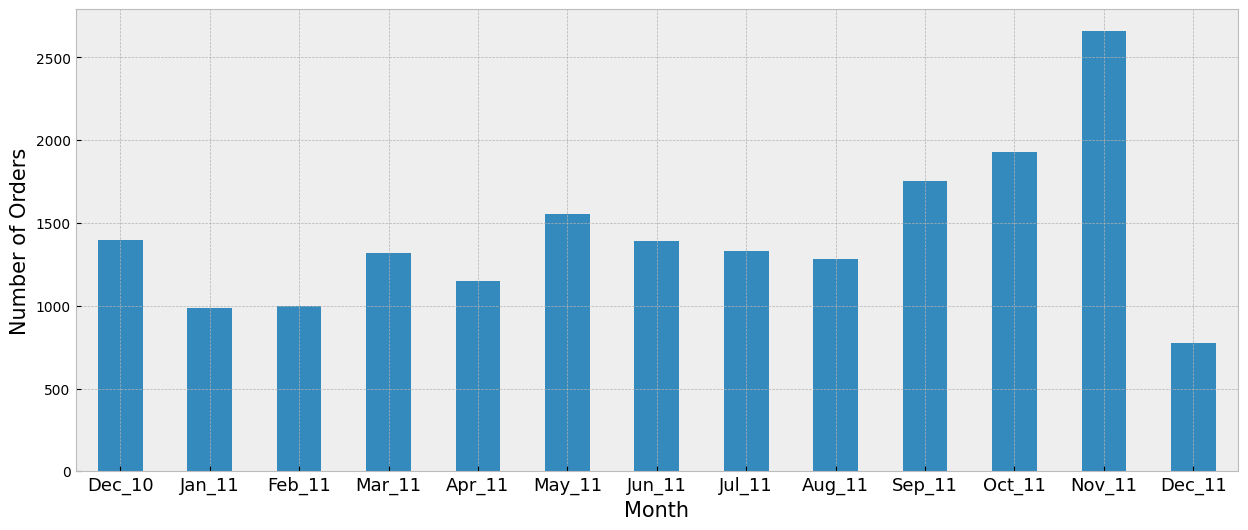

In [24]:
plt.style.use('bmh')
plt.subplots(figsize=(15,6))
ax = df1.groupby('InvoiceNo')['year_month'].unique().value_counts().sort_index().plot(kind='bar')
ax.set_xlabel('Month',fontsize=15)
ax.set_ylabel('Number of Orders',fontsize=15)
ax.set_xticklabels(('Dec_10','Jan_11','Feb_11','Mar_11','Apr_11','May_11','Jun_11','Jul_11','Aug_11','Sep_11','Oct_11','Nov_11','Dec_11'), rotation='horizontal', fontsize=13)
plt.show()


In [25]:
df1[df1['day']==6]

,InvoiceNo,StockCode,year_month,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount


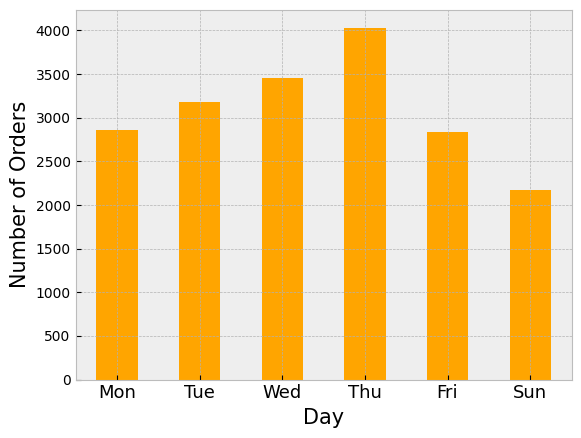

In [27]:
ax = df1.groupby('InvoiceNo')['day'].unique().value_counts().sort_index().plot(kind='bar',color='orange')
ax.set_xlabel('Day',fontsize=15)
ax.set_ylabel('Number of Orders',fontsize=15)
ax.set_xticklabels(('Mon','Tue','Wed','Thu','Fri','Sun'), rotation='horizontal', fontsize=13)
plt.show()

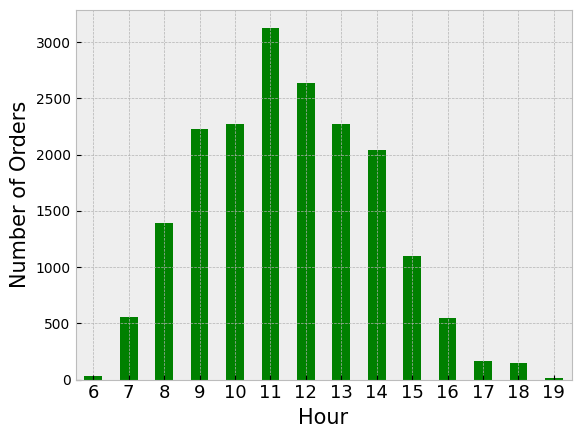

In [33]:
ax = df1.groupby('InvoiceNo')['hour'].unique().value_counts().iloc[:-2].sort_index().plot(kind='bar',color='green')
ax.set_xlabel('Hour',fontsize=15)
ax.set_ylabel('Number of Orders',fontsize=15)
ax.set_xticklabels(range(6,20), rotation='horizontal', fontsize=13)
plt.show()


In [34]:
df1.UnitPrice.describe()

count    397924.000000
mean          3.116174
std          22.096788
min           0.000000
25%           1.250000
50%           1.950000
75%           3.750000
max        8142.750000
Name: UnitPrice, dtype: float64

In [35]:
freeproducts = df1[df1.UnitPrice==0]
freeproducts.head()

,InvoiceNo,StockCode,year_month,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount
9302,537197,22841,201012,12,7,14,ROUND CAKE TIN VINTAGE GREEN,1,2010-12-05 14:02:00,0.0,12647.0,Germany,0.0
33576,539263,22580,201012,12,4,14,ADVENT CALENDAR GINGHAM SACK,4,2010-12-16 14:36:00,0.0,16560.0,United Kingdom,0.0
40089,539722,22423,201012,12,2,13,REGENCY CAKESTAND 3 TIER,10,2010-12-21 13:45:00,0.0,14911.0,EIRE,0.0
47068,540372,22090,201101,1,4,16,PAPER BUNTING RETROSPOT,24,2011-01-06 16:41:00,0.0,13081.0,United Kingdom,0.0
47070,540372,22553,201101,1,4,16,PLASTERS IN TIN SKULLS,24,2011-01-06 16:41:00,0.0,13081.0,United Kingdom,0.0


In [36]:
freeproducts.year_month.value_counts().sort_index()

201012     3
201101     3
201102     1
201103     2
201104     2
201105     2
201107     2
201108     6
201109     2
201110     3
201111    14
Name: year_month, dtype: int64

ValueError: The number of FixedLocator locations (11), usually from a call to set_ticks, does not match the number of labels (13).

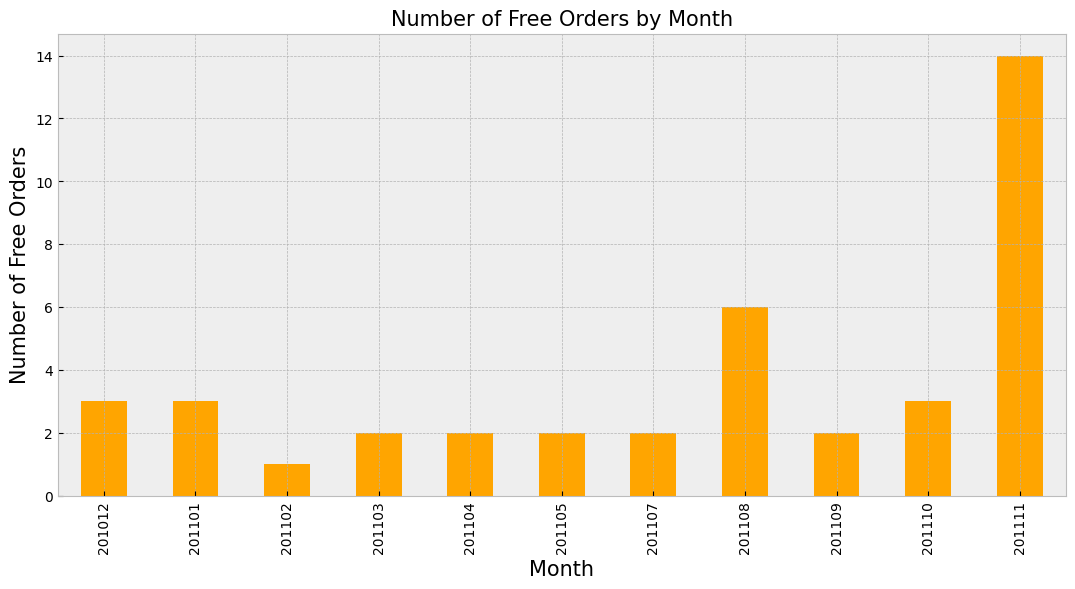

In [38]:
ax = freeproducts.year_month.value_counts().sort_index().plot(kind='bar',figsize=(13,6),color='orange')
ax.set_xlabel('Month',fontsize=15)
ax.set_ylabel('Number of Free Orders',fontsize=15)
ax.set_title('Number of Free Orders by Month',fontsize=15)
ax.set_xticklabels(('Dec_10','Jan_11','Feb_11','Mar_11','Apr_11','May_11','Jun_11','Jul_11','Aug_11','Sep_11','Oct_11','Nov_11','Dec_11'), rotation='horizontal', fontsize=13)
plt.show()

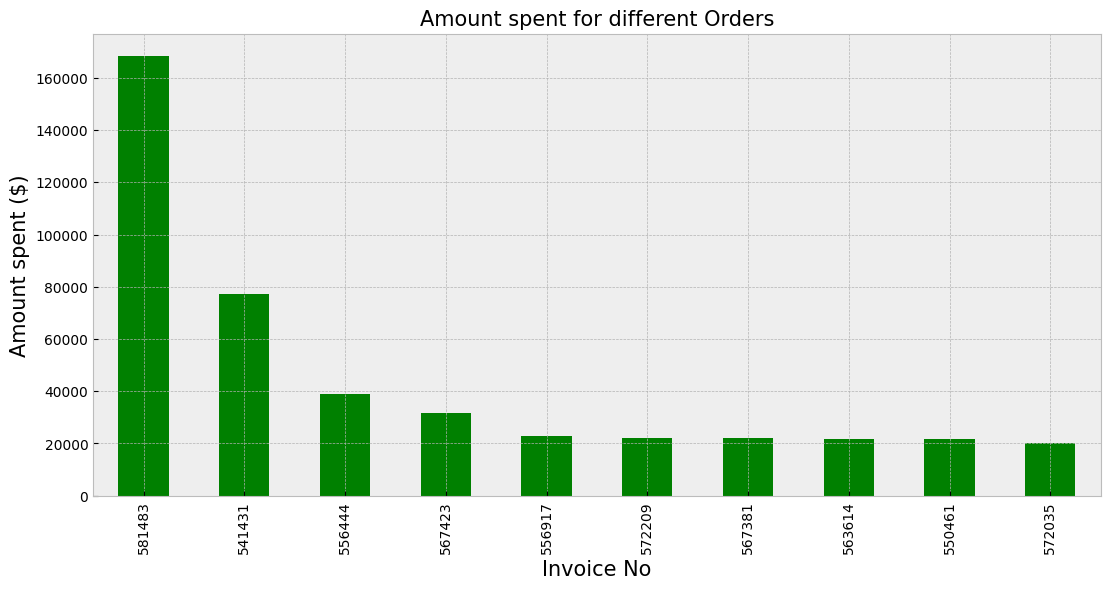

In [39]:
ax = df1.groupby('InvoiceNo')['Amount'].sum().sort_values(ascending=False).head(10).plot(kind='bar',color='green',figsize=(13,6))
ax.set_xlabel('Invoice No',fontsize=15)
ax.set_ylabel('Amount spent ($)',fontsize=15)
ax.set_title('Amount spent for different Orders',fontsize=15)
plt.show()

In [40]:
d_white = df1[df1['Description']=='WHITE HANGING HEART T-LIGHT HOLDER']

In [41]:
d_white.shape

(2028, 13)

In [42]:
len(d_white.CustomerID.unique())

856

In [43]:
# Creating a pivot table that displays the sum of unique Customers who bought particular item

most_customers = df1.pivot_table(index=['StockCode','Description'], values='CustomerID', aggfunc=lambda x: len(x.unique())).sort_values(by='CustomerID', ascending=False)
most_customers
# Since the count for WHITE HANGING HEART T-LIGHT HOLDER matches above length 856, the pivot table looks correct for all items

,,CustomerID
StockCode,Description,
22423,REGENCY CAKESTAND 3 TIER,881
85123A,WHITE HANGING HEART T-LIGHT HOLDER,856
47566,PARTY BUNTING,708
84879,ASSORTED COLOUR BIRD ORNAMENT,678
22720,SET OF 3 CAKE TINS PANTRY DESIGN,640
...,...,...
35916B,BLUE FELT HANGING HEART WITH FLOWER,1
90036F,"FLOWER GLASS GARLD NECKL36""TURQUOIS",1
90037B,TINY CRYSTAL BRACELET GREEN,1


In [44]:
most_customers.reset_index(inplace=True)

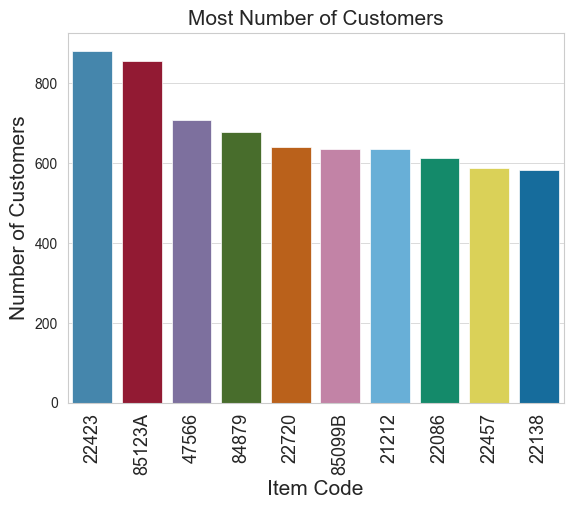

In [46]:
import seaborn as sns
sns.set_style('whitegrid')
sns.barplot(x='StockCode', y='CustomerID', data=most_customers.head(10))
plt.title('Most Number of Customers', fontsize=15)
plt.xticks(rotation='vertical', fontsize=13)
plt.xlabel('Item Code', fontsize=15)
plt.ylabel('Number of Customers', fontsize=15)
plt.show()

In [47]:
df1['items'] = df1['Description'].str.replace(' ' ,'_')
y = df1['InvoiceNo']
y = y.to_list()
invoices = list(set(y))
firstchoice = []
for i in invoices:
    firstpurchase = df1[df1['InvoiceNo']==i]['items'].reset_index(drop=True)[0]
    firstchoice.append(firstpurchase)
firstchoice[:5]
    

KeyboardInterrupt: 